Load libraries and set up environment

In [1]:
import sympy
sympy.init_printing()

Let us consider an explosion with energy $E$ close to the surface of a star. The star has mass $M$ and radius $R$. The distance between the point where the explosion occurred and the surface of the star is $l \ll R$. For this reason, we can assume that the density distribution is planar.

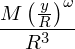

In [2]:
M = sympy.Symbol('M', positive=True) # Star mass
R = sympy.Symbol('R', positive=True) # Star radius
y = sympy.Symbol('y',positive=True) # Distance from the stellar surface
omega = sympy.Symbol('omega', positive=True) # Power law index of the stellar atmosphere density profile
ambient_density = (M/R**3)*(y/R)**omega
ambient_density

where $y$ is the distance from the surface of the star and $\omega$ is a constant. As long as the radius of the explosion is much smaller than $l$, the explosion expands as a Sedov Taylor explosion. When the radius is comparable to $l$, the mass engulfed by the shock is $M \left(l/R\right)^{\omega+3}$

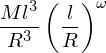

In [3]:
l = sympy.Symbol('l', positive=True) # Depth of the explosion
sd_mass = ambient_density.subs(y,l)*l**3
sd_mass

and the velocity at that point is

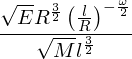

In [4]:
E = sympy.Symbol('E', positive=True) # Energy of the explosion
sd_veloicty = sympy.sqrt(E/sd_mass)
sd_veloicty

Now we focus on a very small region close to the uppermost part of the shock, and assume that from that moment on the shock accelerates according to the Sakurai law. For simplicity, we assume that the slope of the shock front is negligible, so each "slice" evolves as an isolate planar shock wave. We denote by $x$ the coordinate parallel to the stellar surface. The initial distance of each point from the stellar surface is given by

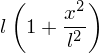

In [5]:
x = sympy.Symbol('x', real=True) # Coordinate parallel to the stellar surface, measured from the explosion site
transition_y = l*(1+(x/l)**2)
transition_y

The component of the velocity normal to the stellar surface

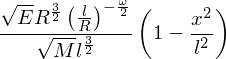

In [6]:
transition_v = sd_veloicty*(1-(x/l)**2)
transition_v

The velocity field is given by the Sakurai law

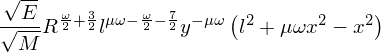

In [7]:
mu = sympy.Symbol('mu', positive=True) # Sakurai parameter, power law index of the velocity - density relation
velocity_field = transition_v*(y/ transition_y)**(-mu*omega)
sympy.expand_power_base(velocity_field, force=True).series(x,0,3).removeO().simplify()

where $\mu \approx 0.2$ is the Sakurai parameter. For a given $x$, we can integrate the equation of motion $\dot{y} = v$ and obtain a trajectory

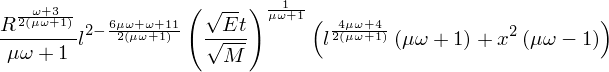

In [8]:
t = sympy.Symbol('t', positive=True) # Time
general_trajectory = sympy.solve(y/t-velocity_field,y)[0]
sympy.expand_power_base(sympy.expand_power_base(general_trajectory,force=True).series(x,0,3).removeO(), force=True).simplify()

We determine the time between the end of the sedov taylor phase and the time the point on the shock front reaches the edge of the star

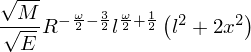

In [26]:
temp = sympy.Eq(general_trajectory, transition_y)
shock_ascent_time = sympy.solve(temp,t)[0]
sympy.expand_power_base(shock_ascent_time).series(x,0,3).removeO().simplify()

Finally, we can get the shape of the shock at every moment (measured from the end of the Sedov Taylor phase)

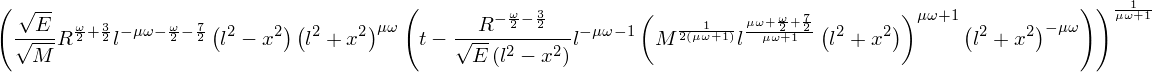

In [10]:
shock_shape = general_trajectory.subs(t, t - shock_ascent_time)
shock_shape

At the moment when the Arete reaches the stellar surface the radius of curvature vanishes

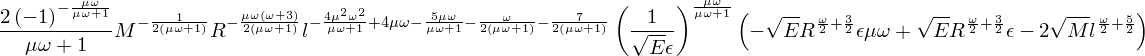

In [53]:
epsilon = sympy.Symbol('epsilon', positive=True)
temp = shock_shape.diff(x,2).subs(x,0)
temp = sympy.expand_power_base(temp, force=True).simplify()
temp = temp.subs(t, shock_ascent_time.subs(x,0)-epsilon)
temp = sympy.expand_power_base(temp, force=True).simplify()
temp